In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import random
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn

In [2]:
df = pd.read_csv('Telco_Customer_Churn.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [6]:
#For some of the data points there is no `TotalCharges` value. We need to find these data points and remove them.
z = df["TotalCharges"].map(lambda x: x.replace('.', '', 1).isdigit())
df = df[z]
df["TotalCharges"] = df["TotalCharges"].astype(float)
df = df.iloc[:-32]

In [7]:
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']

y = y.replace(to_replace = ['No', 'Yes'], value = [0, 1])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [9]:
y_train.sort_values(inplace=True)
X_train = X_train.reindex(y_train.index)

In [10]:
y_test.sort_values(inplace=True)
X_test = X_test.reindex(y_test.index)

In [11]:
# standardize the numerical features
standardize = StandardScaler()
standardize.fit(X_train.iloc[:, :3], y_train)

# standardize.transform(...)
X_train = standardize.transform(X_train)
X_test = standardize.transform(X_test)

In [17]:
def blend(prob, colors=[[1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0.77, 0]]):
    blended = []
    for p in prob:
        r, g, b = 0, 0, 0
        for i in range(len(colors)):
            r, g, b = r+p[i]*colors[i][0], g+p[i]*colors[i][1], b+p[i]*colors[i][2]
        blended.append([r, g, b]) 
    return blended

#### MLPClassifier

In [12]:
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
test_predictions = nn_model.predict(X_test)

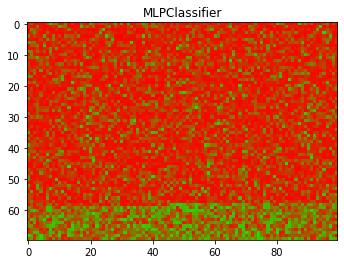

In [25]:
blended = blend(nn_model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]])
to_plot = []
for i in range(70):
    row = []
    for j in range(100):
        row.append(blended[i*70+j])
    to_plot.append(row)
#plt.imshow(np.reshape(blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]]), (70, 100, 3)));
plt.title(nn_model.__class__.__name__)
plt.imshow(to_plot);
plt.show()

#### GaussianNB, KNeighborsClassifier, RandomForestClassifier, LogisticRegression

In [13]:
X_train = np.concatenate((X_train, X_test), axis=0)

In [14]:
y_train = np.concatenate((y_train.to_numpy(), test_predictions), axis=0)

In [15]:
models = [GaussianNB(), KNeighborsClassifier(),RandomForestClassifier(), LogisticRegression()]

In [16]:
model_predictions = []

In [18]:
X_train.shape

(7000, 3)

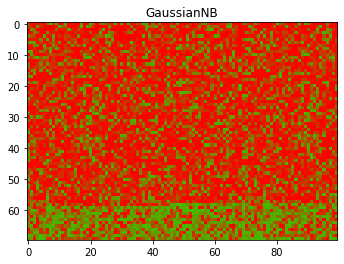

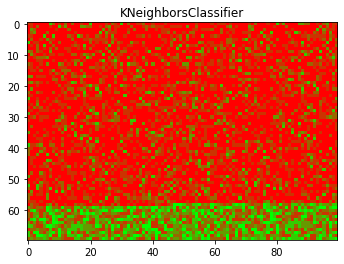

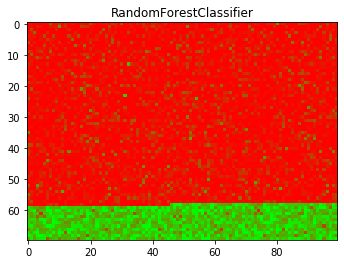

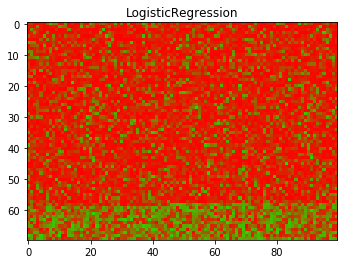

In [19]:
for model in models:
    model.fit(X_train, y_train)
    model_predictions.append(model.predict(X_train))
    blended = blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]])
    to_plot = []
    for i in range(70):
        row = []
        for j in range(100):
            row.append(blended[i*70+j])
        to_plot.append(row)
    #plt.imshow(np.reshape(blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]]), (70, 100, 3)));
    plt.title(model.__class__.__name__)
    plt.imshow(to_plot);
    plt.show()

In [20]:
matrix = np.zeros((4, 4))

In [21]:
for i, pred1 in enumerate(model_predictions):
    for j, pred2 in enumerate(model_predictions):
        matrix[i, j] = sum([1 for x, y in zip(pred1, pred2) if x == y])

In [22]:
labels = [x.__class__.__name__ for x in models]

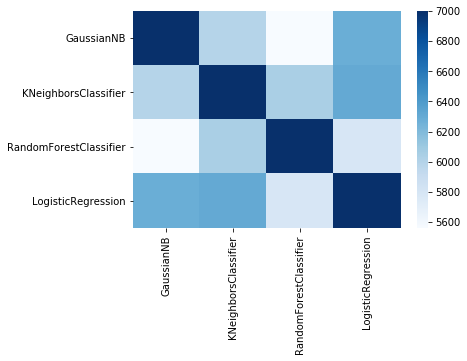

In [23]:
seaborn.heatmap(matrix, xticklabels=labels,yticklabels=labels, cmap='Blues')